### A broad class of clustering

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster


In [2]:
# unique nice clustering dataset
def unique_nice_clustered_data(k=4, dim=2, cluster_size=25, seed=42):
    np.random.seed(seed)
    data = np.zeros((cluster_size * k, dim))
    for k_i in range(1, k+1):
        center = np.array([np.random.uniform(10*k_i, 15*k_i) for i in range(dim)])
        # generate cluster_size points centered around center
        data[(k_i - 1) * cluster_size:k_i * cluster_size, :] = center + np.random.randn(cluster_size, dim)
    return data


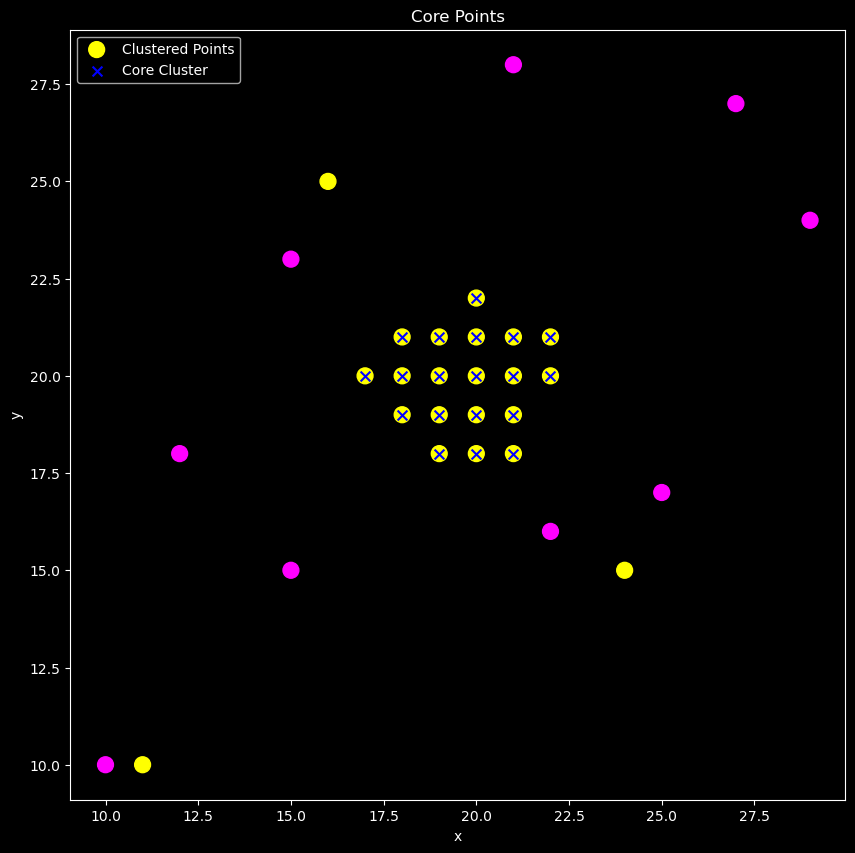

In [52]:
# 1 means in cluster, 0 means not in cluster
core_vis_data = np.array([
    [20, 20, 1],
    [19, 20, 1],
    [20, 21, 1],
    [21, 20, 1],
    [20, 19, 1],
    [19, 19, 1],
    [19, 21, 1],
    [21, 21, 1],
    [21, 19, 1],
    [18, 20, 1],
    [20, 18, 1],
    [22, 20, 1],
    [20, 22, 1],
    [18, 19, 1],
    [19, 18, 1],
    [21, 18, 1],
    [18, 21, 1],
    [22, 21, 1],
    [17, 20, 1],
    [27, 27, 0],
    [29, 24, 0],
    [15, 23, 0],
    [16, 25, 1],
    [24, 15, 1],
    [25, 17, 0],
    [22, 16, 0],
    [10, 10, 0],
    [11, 10, 1],
    [21, 28, 0],
    [15, 15, 0],
    [12, 18, 0]
])

# Core Points (Z)
# if d(x, z) < d(x, y)
# for all x in Cluster, z in Core Cluster and y not in Cluster
Z = np.array([
    [20, 20],
    [19, 20],
    [20, 21],
    [21, 20],
    [20, 19],
    [19, 19],
    [19, 21],
    [21, 21],
    [21, 19],
    [18, 20],
    [20, 18],
    [22, 20],
    [20, 22],
    [18, 19],
    [19, 18],
    [21, 18],
    [18, 21],
    [22, 21],
    [17, 20],
])

# plot data
plt.figure(figsize=(10, 10))
plt.scatter(
    core_vis_data[:, 0],
    core_vis_data[:, 1],
    c=core_vis_data[:, 2],
    cmap='spring',
    s=130
)
plt.scatter(Z[:, 0], Z[:, 1], s=50, c='b', marker='x')
plt.title('Core Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Clustered Points', 'Core Cluster'], loc='upper left')
plt.show()
